In [1]:
from arc import *
from arc.alkali_atom_functions import AlkaliAtom
import matplotlib.pyplot as plt

In [2]:
atom=Rubidium87()
f = atom.getRabiFrequency(n1=70,  l1=0, j1=0.5, mj1=0.5,  n2=6,  l2=1, j2=3/2, q=1, laserPower=75*10**(-3), laserWaist=90*10**(-6), s=0.5)
                           ### n1, l1,  j1, mj1, n2, l2,  j2,  q,   laserPower,  laserWaist, s=0.5 
print(f"omega/2pi = {f/(2*pi)}")
print(f"omega = {f}")

omega/2pi = 7696358.668994951
omega = 48357647.707813315


In [3]:
atom=Rubidium87()
# transition from 5s to 6p
O5s_6p = atom.getRabiFrequency(n1=5,  l1=0, j1=0.5, mj1=0.5,  n2=6,  l2=1, j2=3/2, q=-1, laserPower=1.7*10**(-3), laserWaist=40*10**(-6), s=0.5)
                           ### n1, l1,  j1, mj1, n2, l2,  j2,  q,   laserPower,  laserWaist, s=0.5 
print("omega/2pi =", "{:e}".format(O5s_6p/(2*pi)))
print("omega =", "{:e}".format(O5s_6p))

omega/2pi = 4.511251e+07
omega = 2.834502e+08


In [4]:
atom=Rubidium87()
atom.getReducedMatrixElementL(n1=5,  l1=0, j1=0.5,  n2=6,  l2=1, j2=3/2)

0.4685197434473813

In [5]:
atom=Rubidium87()
atom.getReducedMatrixElementL(n1=70,  l1=0, j1=0.5,  n2=6,  l2=1, j2=3/2)

0.015632626928671633

In [6]:
atom=Rubidium87()
# transition from 6p to 70s
O6p_70s = atom.getRabiFrequency(n1=70,  l1=0, j1=0.5, mj1=0.5,  n2=6,  l2=1, j2=3/2, q=-1, laserPower=75*10**(-3), laserWaist=200*10**(-6), s=0.5)
                           ### n1, l1,  j1, mj1, n2, l2,  j2,  q,   laserPower,  laserWaist, s=0.5 
print("omega/2pi =", "{:e}".format(O6p_70s/(2*pi)))
print("omega =", "{:e}".format(O6p_70s))

omega/2pi = 1.999573e+06
omega = 1.256369e+07


In [16]:
delta_blue = 218*10**(6) # Hz
blue_waiste = 40*10**(-6) # m
blue_power = 1.6*10**(-3) # Watt
IR_waste = 129*10**(-6) # m
IR_power = 43*10**(-3) # Watt

atom=Rubidium87()

# transition from 5s to 6p
O5s_6p = atom.getRabiFrequency(n1=5,  l1=0, j1=0.5, mj1=0.5,  n2=6,  l2=1, j2=3/2, q=-1, laserPower=blue_power, laserWaist=blue_waiste, s=0.5)/(2*pi)
# transition from 6p to 70s
O6p_70s = atom.getRabiFrequency(n1=70,  l1=0, j1=0.5, mj1=0.5,  n2=6,  l2=1, j2=3/2, q=-1, laserPower=IR_power, laserWaist=IR_waste, s=0.5)/(2*pi)

def omega_two_ph(delta_IR=0): return np.sqrt((O5s_6p**2*O6p_70s**2)/(delta_blue)**2+(2*pi*delta_IR)**2)

print("omega_2ph/2pi =", "{:e}".format(omega_two_ph()))#/(2*pi)))
print("omega_2ph =", "{:e}".format(omega_two_ph()*(2*pi)))

omega_2ph/2pi = 4.712562e+05
omega_2ph = 2.960990e+06


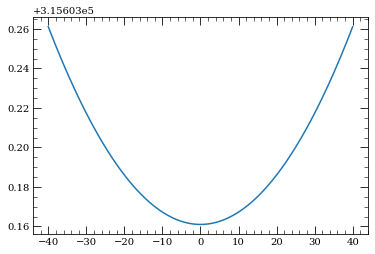

In [8]:
detunings = np.linspace(-40, 40, 100)
rabi_2_ph = omega_two_ph(detunings)

plt.plot(detunings, rabi_2_ph)
plt.show()

In [9]:
tet_c6s = []

for theta in np.linspace(0,2*np.pi,10):
    for phi in np.linspace(0,2*np.pi,10):
        tet_c6s.append(-PairStateInteractions(atom, 70, 0, 0.5, 70, 0, 0.5, 0.5, 0.5, interactionsUpTo=1, s=0.5).getC6perturbatively(theta,phi, 6, 25e9))
plt.plot(tet_c6s)

KeyboardInterrupt: 